Author: Calvin Wijaya

Created: May, 6th 2023

This notebook is used to learn about image classification with CNN using Canadian Institute for Advanced Research, 10 classes (CIFAR-10) data. [The CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) is a collection of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The classes represent common objects and animals, such as airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks. The dataset is commonly used for machine learning and computer vision research, particularly in the development and evaluation of image classification algorithms.

In [1]:
# Import Library
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import pandas as pd

# Create Training & Test Dataset

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


`x_train` and `y_train` are the **training images and labels**, respectively. These are the data that will be used to train the machine learning model. The `x_test` and `y_test` variables, on the other hand, are the **testing images and labels**, respectively. These are the data that will be used to evaluate the performance of the trained model.

In [3]:
# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

To see what's inside `_train` and `_test` variable, the code below will show an image of a **cat** class, then showing the `x_train` and `y_train` of it.

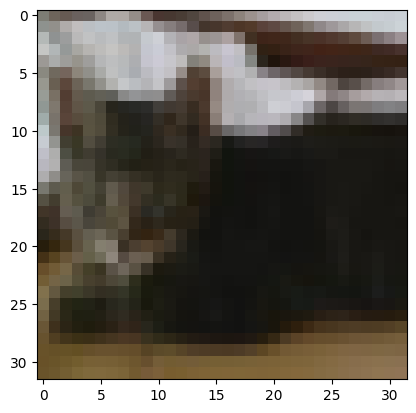

        R    G    B  Label Class
0     125  125  116      3   cat
1     110  101   91      3   cat
2     102   90   83      3   cat
3     106   97   94      3   cat
4     106   99   96      3   cat
...   ...  ...  ...    ...   ...
1019  138  112   79      3   cat
1020  140  114   81      3   cat
1021  143  117   82      3   cat
1022  143  116   84      3   cat
1023  144  116   86      3   cat

[1024 rows x 5 columns]


In [4]:
# Find the index of the first 'cat' image in the training data
cat_idx = (y_train == 3).flatten().nonzero()[0][0]

# Extract the first 'cat' image and its label from the training data
cat_img = x_train[cat_idx]
cat_label = y_train[cat_idx][0]

# Reshape the image data to be a 2D array with 3 columns (one for each color channel)
cat_img_reshaped = cat_img.reshape(-1, 3)

# Create a DataFrame to display the 'cat' image and its label
df = pd.DataFrame({'R': cat_img_reshaped[:, 0], 'G': cat_img_reshaped[:, 1], 'B': cat_img_reshaped[:, 2], 'Label': [cat_label] * cat_img_reshaped.shape[0]}, columns=['R', 'G', 'B', 'Label'])
df['Class'] = df['Label'].map({i: name for i, name in enumerate(class_names)})

# Display the 'cat' image
plt.imshow(cat_img)
plt.show()

# Print the DataFrame
print(df)


The R, G, and B columns represent the Red, Green, and Blue color channels of the image, respectively. The RGB values of the images are used as the features or inputs to the machine learning model, which will then use those features to predict the label or class of new images. The `x_train` variable contains the RGB values of the training images, while the `y_train` variable contains the corresponding labels. The `y_train` variable contains only one column, which is the label of each image in the training set. The label is represented as an integer value between 0 and 9, where each integer corresponds to a specific class. The `y_train` is simply a 1D numpy array of integers, where each integer represents the label or class of a single image in the training set.

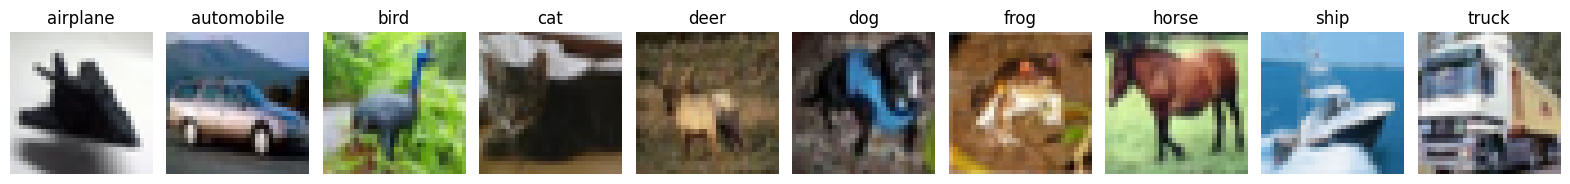

In [5]:
# Plot a sample image for each class
fig, axs = plt.subplots(1, len(class_names), figsize=(20, 2))
fig.subplots_adjust(wspace=0.1)
for i in range(len(class_names)):
    # Find the index of the first image in the training set with the current class label
    idx = np.where(y_train == i)[0][0]
    # Plot the image
    axs[i].imshow(x_train[idx])
    axs[i].set_title(class_names[i])
    axs[i].axis('off')
plt.show()

In remote sensing, a single image can contain multiple classes or labels, where each pixel in the image can be assigned to one or more classes, depending on the type of land cover classification problem you're trying to solve.

However, in the case of CIFAR-10 dataset, each image only has a single label or class, and all pixels in the image are associated with the same label. This means that the task is to classify the entire image into one of the 10 possible classes, based on its contents, rather than labeling individual pixels in the image. The RGB values of the pixels are used as features to help classify the image into one of the classes.

# Pre-Processing The Dataset

In [6]:
# Normalize pixel values
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

Normalizing the pixel values of `x_train` and `x_test` is important because it helps the model to converge faster during training. The pixel values of the images in CIFAR-10 range from 0 to 255, with 0 representing black and 255 representing white. However, the large range of values can cause problems for some machine learning algorithms, such as deep neural networks.

By normalizing the pixel values to a range between 0 and 1, we can improve the performance of the model and help ensure that the gradients during backpropagation are well-behaved. This can help speed up the convergence of the model during training and can also help prevent issues such as exploding or vanishing gradients.

Normalization can also help with generalization, as it can reduce the impact of differences in pixel intensity across different images, making it easier for the model to learn meaningful patterns in the data.

In [7]:
# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

One-hot encoding is a technique used to represent categorical data as numerical data. In machine learning, it is often necessary to convert categorical data into numerical data, and one-hot encoding is a commonly used method to achieve this. 

One-hot encoding creates a binary vector for each category of the categorical variable, where only one bit is set to 1 and the rest are set to 0. For example, suppose we have a categorical variable "color" with three possible values: "red", "green", and "blue". To one-hot encode this variable, we would create three binary vectors: [1, 0, 0], [0, 1, 0], and [0, 0, 1], where each vector corresponds to "red", "green", and "blue", respectively. Then, to represent a data point with "green" color, we would use the binary vector [0, 1, 0]. 

One-hot encoding is useful in machine learning because it allows algorithms to treat categorical data as numerical data, which can be easier to work with. Additionally, one-hot encoding ensures that there is no inherent numerical order between the categories, which can be important in some cases.

Converting labels to one-hot encoding is a common technique used in machine learning for classification tasks. In the case of CIFAR-10 dataset, each image belongs to one of the 10 possible classes. One-hot encoding allows us to represent the label of each image as a vector of length 10, where each element of the vector corresponds to a class and is either 0 or 1 depending on whether the image belongs to that class or not.

This is important because machine learning algorithms typically cannot work directly with categorical data like class labels. Instead, they require numerical inputs. One-hot encoding provides a way to represent categorical data numerically without imposing any ordinal relationship between the classes. This means that the model can learn to differentiate between the classes without assuming that one class is "higher" or "lower" than another.

# CNN Model Definition

This is a typical CNN Architecture:

![link text](https://editor.analyticsvidhya.com/uploads/59954intro%20to%20CNN.JPG)

This notebook will define the architecture like this:

In [8]:
# Define the model
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3), name="conv1"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu", name="conv2"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu", name="conv3"),
        layers.Flatten(),
        layers.Dense(64, activation="relu", name="dense1"),
        layers.Dense(10, activation="softmax", name="dense2"),
    ],
    name="CIFAR10_Model"
)

model.summary()

Model: "CIFAR10_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)            

Model Explanation:

1. A 2D convolutional layer with 32 filters, a kernel size of (3, 3), and the ReLU activation function. Each filter in the convolutional layer performs a different operation on the input image, and the resulting 32 feature maps represent different aspects of the image that the model can learn to recognize. The kernel or filter is essentially a set of learnable parameters that are adjusted during training to optimize the performance of the model.
The input shape is (32, 32, 3), meaning that the model expects images of size 32x32 with 3 color channels (RGB).

2. A 2D max pooling layer with a pool size of (2, 2). The MaxPooling2D layer is used to downsample the feature maps generated by the previous convolutional layer. This reduces the spatial dimensionality of the feature maps and makes the model more robust to variations in the input images. In the case of MaxPooling2D(pool_size=(2, 2)), the layer will divide the input feature maps into non-overlapping 2x2 blocks, and for each block, it will output the maximum value. This effectively reduces the size of the feature maps by a factor of 2 in both the horizontal and vertical dimensions. For example, if the input feature maps have a size of 32x32, the MaxPooling2D layer will output feature maps of size 16x16.

![link text](https://production-media.paperswithcode.com/methods/MaxpoolSample2.png)

3. Another 2D convolutional layer with 64 filters, a kernel size of (3, 3), and the ReLU activation function. The third layer is also a 2D convolutional layer, with 64 filters and a kernel size of (3, 3). Each filter produces a feature map, and so there will be 64 feature maps outputted by this layer. The third layer applies another 2D convolution to the output of the second layer, which further reduces the dimensions of the feature maps. This is because the convolution operation slides the kernel over the input image with a certain stride, which causes the output feature maps to be smaller than the input. In this case, the third layer applies 64 filters with a kernel size of 3x3 to the 16x16 feature maps produced by the second layer, resulting in 64 feature maps with dimensions of 14x14. The ReLU activation function is then applied to each element in each feature map.

4. Another 2D max pooling layer with a pool size of (2, 2).

5. A third 2D convolutional layer with 128 filters, a kernel size of (3, 3), and the ReLU activation function.

6. A flatten layer that converts the output of the convolutional layers into a 1D array. The layers.Flatten() layer is used to convert the 2D output from the previous convolutional layer into a 1D array that can be used as input to a fully connected neural network layer. In other words, it flattens the output feature maps into a one-dimensional vector, while preserving all the information in the feature maps. This layer does not have any learnable parameters, it just performs a reshaping operation on the data. After the final convolutional layer, the output shape is (1, 4, 4, 128) and then after flattening, the output shape will be (1 x 2048) or (1 x 16 x 128).

![link text](https://www.simplilearn.com/ice9/free_resources_article_thumb/flattening.png)

7. A fully connected (dense) layer with 64 units and the ReLU activation function. The shape of the weight matrix in the Dense layer is determined by the number of input nodes and the number of output nodes. In your case, you have a flattened 1D array of length 2048 as input to the Dense layer, and you specified that the output should have 64 nodes. Therefore, the weight matrix will have shape (2048, 64), with 2048 rows (one for each input node) and 64 columns (one for each output node). Each element in the weight matrix represents the strength of the connection between an input node and an output node. Input: 1D arrah (1x2048) multiply with weight matrix (2048x64) resulting (1x64) node.

![link text](https://indiantechwarrior.com/wp-content/uploads/2022/05/Hidden-Layer-1-1024x603.png)


8. Another fully connected layer with 10 units (one for each class in the CIFAR-10 dataset) and the softmax activation function, which produces a probability distribution over the 10 classes. The weight matrix for this layer has a shape of (64, 10), and the resulting output of this layer is a 1D array of length 10, where each element represents the probability of the input belonging to one of the 10 classes in the dataset. The softmax activation function is used to ensure that the output values are between 0 and 1 and sum up to 1, making it suitable for classification problems.

To see what is a **Feature Maps** exactly, run this code below to see visualization of it:

1/1 [==============================] - 0s 129ms/step


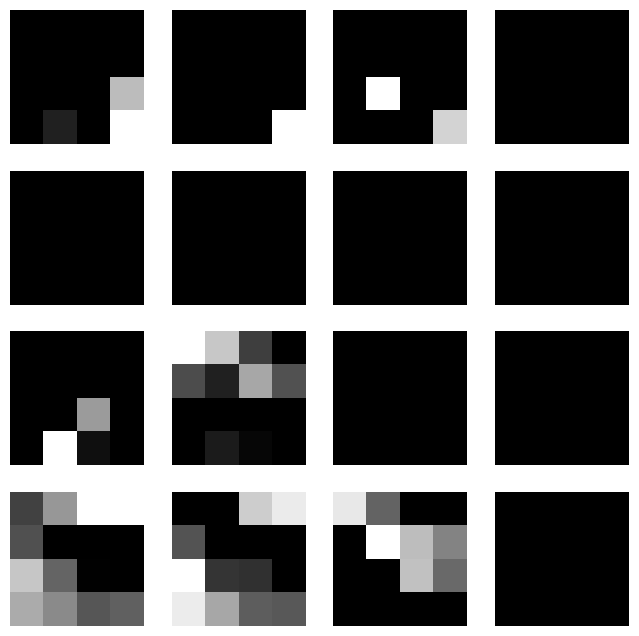

In [ ]:
# import numpy as np
# from tensorflow import keras
# from tensorflow.keras import layers, utils
# from matplotlib import pyplot as plt

# # Load the CIFAR-10 data
# (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# # Find the index of the first 'cat' image in the training data
# cat_idx = (y_train == 3).flatten().nonzero()[0][0]

# # Extract the first 'cat' image and its label from the training data
# cat_img = x_train[cat_idx]
# cat_label = y_train[cat_idx][0]

# # Reshape the image data to be a 4D tensor with shape (1, height, width, channels)
# cat_img = cat_img.reshape(1, cat_img.shape[0], cat_img.shape[1], cat_img.shape[2])

# # Define the convolutional neural network model
# model = keras.Sequential(
#     [
#         layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Conv2D(64, (3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Conv2D(128, (3, 3), activation="relu"),
#     ]
# )

# # Get the feature maps for the first 'cat' image using the convolutional model
# feature_maps = model.predict(cat_img)

# # Plot the first 16 feature maps
# fig, axs = plt.subplots(4, 4, figsize=(8, 8))
# for i in range(16):
#     axs[i//4, i%4].imshow(feature_maps[0, :, :, i], cmap='gray')
#     axs[i//4, i%4].axis('off')
# plt.show()

In a convolutional neural network (CNN), the first few layers typically learn to detect simple features such as edges, corners, and blobs of color, while the later layers learn to detect more complex features that are combinations of the simple features detected by the earlier layers. As a result, the feature maps in the later layers tend to be more abstract and high-level than those in the earlier layers.

For example, in the **first layer** of a CNN that is trained to recognize images of cats and dogs, some of the filters might learn to *detect edges in the image, while others might learn to detect diagonal lines or corners*. The resulting feature maps would show where these features are present in the input image.

In the **second layer**, some of the filters might learn to *detect the presence of certain combinations of edges or corners, while others might learn to detect more complex patterns such as circles or curves*. The resulting feature maps would represent higher-level features than those in the first layer.

Finally, in the **last layer**, the filters might learn to *detect even more complex patterns that are specific to cats or dogs, such as the shape of the ears, the pattern of the fur, or the position of the eyes*. The resulting feature maps would be even more abstract and high-level than those in the earlier layers, and would represent the network's understanding of the overall structure of the image.

So, to summarize, the feature maps in the later layers of a CNN tend to be more abstract and high-level because they are learning to detect complex patterns that are combinations of the simpler features detected by the earlier layers.

This code shows what **Flatten Layers** do to Feature Maps:

In [ ]:
# print("Feature Maps: ", feature_maps[0, :, :, 0])

# # Flatten only the first feature map
# flattened = layers.Flatten()(feature_maps[:,:,:,0])

# # Print the shape of the flattened feature map
# print("Flattened Feature Maps: ", flattened.numpy())

Feature Maps:  [[23.005066  14.6272335  3.8361585 10.294584 ]
 [17.34934   10.6943035 18.167767  22.08898  ]
 [ 5.885882   6.6550584  6.6221943  4.19621  ]
 [ 6.717424   4.8486347  1.1960933  0.       ]]
Flattened Feature Maps:  [[23.005066  14.6272335  3.8361585 10.294584  17.34934   10.6943035
  18.167767  22.08898    5.885882   6.6550584  6.6221943  4.19621
   6.717424   4.8486347  1.1960933  0.       ]]


# Training Model

Before training the model, we need to compile our model. This code compiles the model and specifies the optimizer, loss function, and evaluation metric(s) to be used during training.

Here's what each argument means:
- `optimizer`: the algorithm used to update the weights of the neural network during training. In this case, the Adam optimizer is used, which is a popular stochastic gradient descent optimization algorithm.
- `loss`: the objective function that the model will try to minimize during training. In this case, `categorical_crossentropy` is used, which is a common loss function for multiclass classification problems.
- `metrics`: a list of metrics to be evaluated by the model during training and testing. In this case, the model will be evaluated using accuracy, which is a common metric for classification problems.

In [9]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

After compiling, we can start training our model. This code trains the compiled model using the training data `x_train` and `y_train` for 10 epochs (iterations over the entire dataset) with a batch size of 64. During training, the model's performance is evaluated on the validation set (`x_test`, `y_test`) after each epoch. The `fit` method updates the weights of the model based on the loss calculated during training, with the aim of minimizing the loss function and improving the model's accuracy.

In [10]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 16s 7ms/step - loss: 1.5388 - accuracy: 0.4375 - val_loss: 1.2442 - val_accuracy: 0.5593
Epoch 2/10
782/782 [==============================] - 5s 7ms/step - loss: 1.1374 - accuracy: 0.5989 - val_loss: 1.0551 - val_accuracy: 0.6299
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.9822 - accuracy: 0.6568 - val_loss: 1.0184 - val_accuracy: 0.6512
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 0.8686 - accuracy: 0.6955 - val_loss: 0.9038 - val_accuracy: 0.6814
Epoch 5/10
782/782 [==============================] - 5s 7ms/step - loss: 0.7912 - accuracy: 0.7236 - val_loss: 0.8732 - val_accuracy: 0.6975
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.7234 - accuracy: 0.7490 - val_loss: 0.8144 - val_accuracy: 0.7195
Epoch 7/10
782/782 [==============================] - 5s 7ms/step - loss: 0.6682 - accuracy: 0.7659 - val_loss: 0.8863 - val_accuracy: 0.7012
Epoch

# Evaluate Model

After we get our trained model stored in `model` variable, we need to evaluate the model. This code evaluates the performance of the trained model on a separate test dataset. 

First, it uses the `evaluate` method of the `model` object to compute the loss and accuracy of the model on the test dataset, which are then stored in the `test_loss` and `test_acc` variables, respectively.

Finally, the code prints out the test accuracy of the model using the `print` function.

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.8665 - accuracy: 0.7146
Test accuracy: 0.7146000266075134


Create confusion matrix:

313/313 [==============================] - 1s 2ms/step


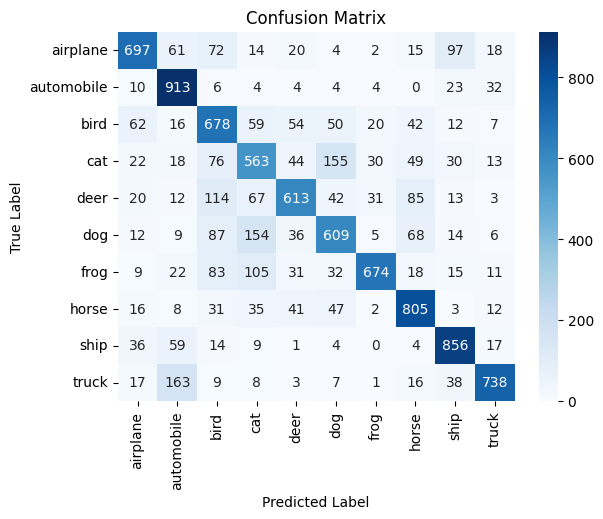

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Predict classes for test set
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Define true labels for test set
y_true = np.argmax(y_test, axis=1)

# Compute evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot confusion matrix using seaborn heatmap
sns.heatmap(confusion_mtx, cmap="Blues", annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)

# Set plot properties
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Model Prediction

After we get our trained model, we can use it to predict other image that never seen by the model before.

313/313 [==============================] - 1s 2ms/step


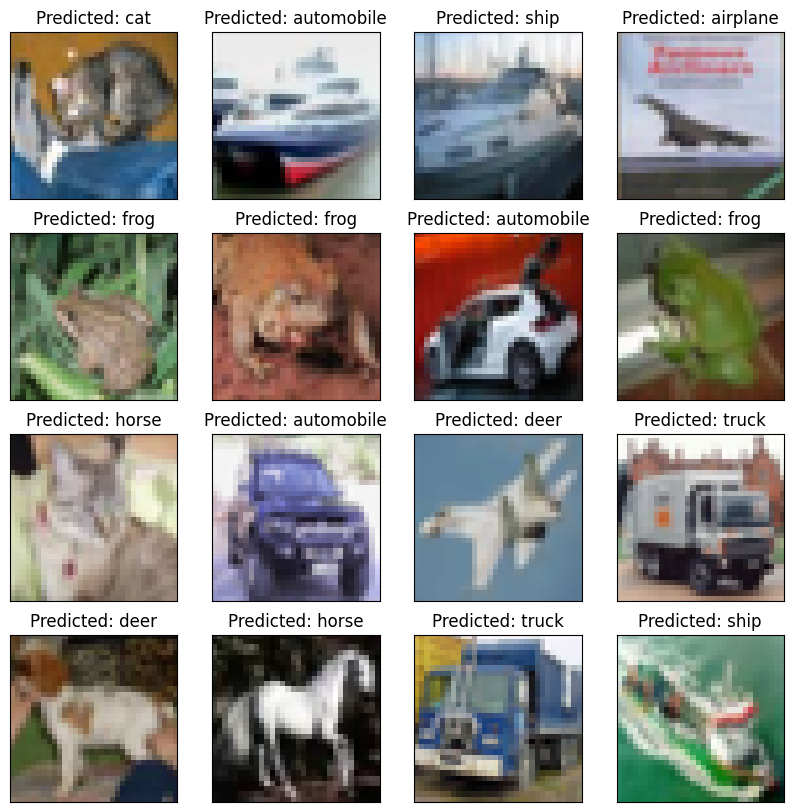

In [13]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Make predictions
y_pred = model.predict(x_test)

# Convert predicted values from numbers to class names
predicted_classes = [class_names[np.argmax(pred)] for pred in y_pred]

# Plot some examples
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    # Plot image
    ax.imshow(x_test[i])

    # Set title to predicted class
    ax.set_title("Predicted: {}".format(predicted_classes[i]))

    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

# Show the plot
plt.show()

In [16]:
from google.colab import files
file = files.upload()

Saving kuda.jpg to kuda.jpg


1/1 [==============================] - 0s 28ms/step


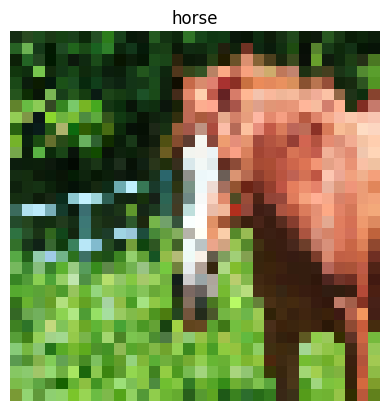

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the image
img = tf.keras.preprocessing.image.load_img('kuda.jpg', target_size=(32, 32))
img_arr = tf.keras.preprocessing.image.img_to_array(img)
img_arr = np.array([img_arr])

# Predict the label of the image
pred_label = np.argmax(model.predict(img_arr), axis=-1)[0]

# Define the label names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize the image and print the predicted label
plt.imshow(img)
plt.title(class_names[pred_label])
plt.axis('off')
plt.show()

# Comparison with Machine Learning

This code below will use Supervised Machine Learning Algorithm Random Forest to do exactly what we have done with CNN before. 

Caution, it can take long time to train. Random Forest models are ensembles of decision trees, and training each tree involves evaluating the quality of a set of potential splits for each node in the tree. This process can be computationally intensive, especially when dealing with large datasets. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Flatten the image data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Define the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(x_train, y_train.ravel())

# Evaluate the model
test_acc = rf.score(x_test, y_test)
print("Test accuracy:", test_acc)

Test accuracy: 0.4654


From the evaluation we get to know that the CNN model outperform the RF model. The CNN model generally performs better than traditional machine learning models like Random Forests for image classification tasks, especially when dealing with complex and large datasets like CIFAR-10. This is because CNNs are designed to learn hierarchical representations of the input data, which can capture intricate patterns and relationships between features that may be difficult to capture with handcrafted feature engineering or traditional machine learning models.